## Baryon asymmetry

https://arxiv.org/pdf/1908.04818.pdf

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [3]:
#Read old file
yd = pd.read_csv('good-points.csv')
del yd['Unnamed: 0']

yd.shape

(1330, 105)

In [4]:
#zd = yd[yd.mchi < 10.0]

In [5]:
#zd.to_csv('good-points2.csv')

In [6]:
#Read old file
xd = pd.read_csv('nbs-scan.csv')
del xd['Unnamed: 0']

xd.shape

(210511, 10)

cleaning NAN and negative values in $\Delta n_B$

In [7]:
xd = xd[np.logical_and(xd.Deltan_B >0, xd.MZp > 1e-3)]

In [8]:
xd.shape

(84408, 10)

$$ s \approx 2\pi^2 g^{*}T_c^3/45  $$

$$ g^{*}\approx g_B +(7/8)g_F \approx \mathcal{O}(100) $$

$$ \eta_B = \dfrac{\Delta n_B}{s} \approx 0.9 \times 10^{-10}$$

experimental value

In [9]:
eta_exp = 0.9*1e-10
eta_min = (5.8/7.04)*1e-10
eta_max = (6.5/7.04)*1e-10

In [10]:
print(eta_min,eta_exp,eta_max)

8.238636363636364e-11 9e-11 9.232954545454546e-11


### entropy $s$ value

In [11]:
Tc = 246.
gx = 100.
entropy = (2.*np.pi**2*gx*(Tc**3)/45.)
print(entropy)

653014084.7303805


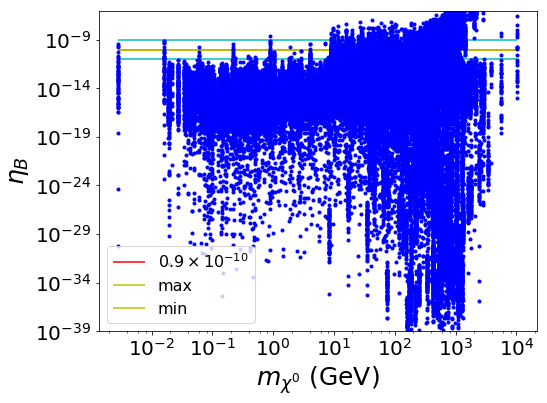

In [12]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mot,xd.Deltan_B/entropy,'b.',label=r'')

plt.hlines(1e-11,xd.mot.min(),xd.mot.max(),'c',label=r'')
plt.hlines(0.9e-10,xd.mot.min(),xd.mot.max(),'r',label=r'$0.9 \times 10^{-10}$')
plt.hlines(1e-9,xd.mot.min(),xd.mot.max(),'c',label=r'')

#Experimental range
plt.hlines(eta_max,xd.mot.min(),xd.mot.max(),'y',label=r'max')
plt.hlines(eta_min,xd.mot.min(),xd.mot.max(),'y',label=r'min')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.ylim(1e-39,1e-6)

plt.tight_layout()
#plt.savefig('../DarkBariogenesis/plots/nB.pdf')
plt.show()

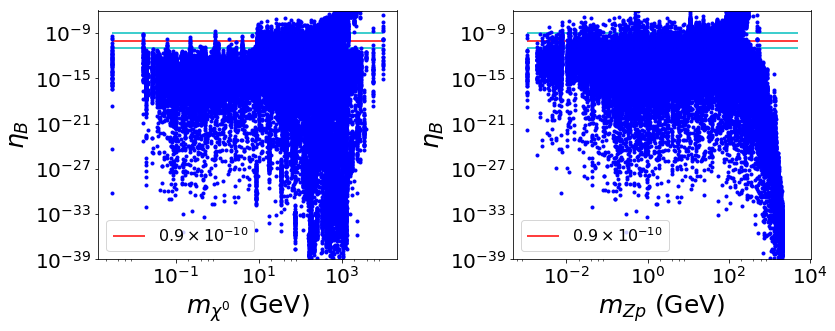

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.loglog(xd.mot,xd.Deltan_B/entropy,'b.',label=r'')

plt.hlines(1e-11,xd.mot.min(),xd.mot.max(),'c',label=r'')
plt.hlines(0.9e-10,xd.mot.min(),xd.mot.max(),'r',label=r'$0.9 \times 10^{-10}$')
plt.hlines(1e-9,xd.mot.min(),xd.mot.max(),'c',label=r'')


plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.ylim(1e-39,1e-6)

plt.subplot(122)
plt.loglog(xd.MZp,xd.Deltan_B/entropy,'b.',label=r'')

plt.hlines(1e-11,xd.MZp.min(),xd.MZp.max(),'c',label=r'')
plt.hlines(0.9e-10,xd.MZp.min(),xd.MZp.max(),'r',label=r'$0.9 \times 10^{-10}$')
plt.hlines(1e-9,xd.MZp.min(),xd.MZp.max(),'c',label=r'')

plt.xlabel(r'$m_{Zp}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.ylim(1e-39,1e-6)

plt.tight_layout()
plt.show()

good points

In [14]:
gp=xd[np.logical_and(xd.Deltan_B/entropy > 1e-11 , xd.Deltan_B/entropy<1e-9)]

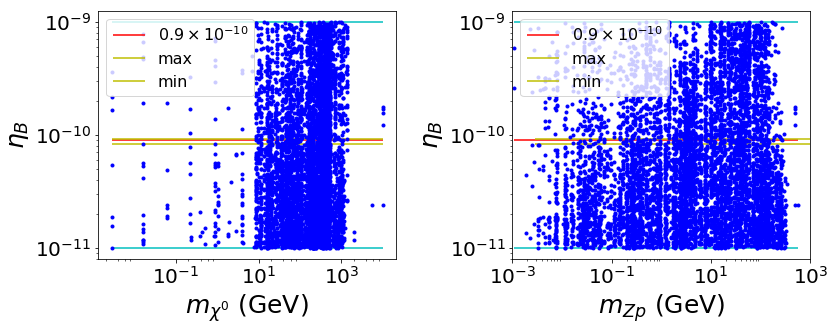

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.loglog(gp.mot,gp.Deltan_B/entropy,'b.',label=r'')

plt.hlines(1e-11,gp.mot.min(),gp.mot.max(),'c',label=r'')
plt.hlines(0.9e-10,gp.mot.min(),gp.mot.max(),'r',label=r'$0.9 \times 10^{-10}$')
plt.hlines(1e-9,gp.mot.min(),gp.mot.max(),'c',label=r'')
#Experimental range
plt.hlines(eta_max,xd.mot.min(),xd.mot.max(),'y',label=r'max')
plt.hlines(eta_min,xd.mot.min(),xd.mot.max(),'y',label=r'min')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.subplot(122)
plt.loglog(gp.MZp,gp.Deltan_B/entropy,'b.',label=r'')

plt.hlines(1e-11,gp.MZp.min(),gp.MZp.max(),'c',label=r'')
plt.hlines(0.9e-10,gp.MZp.min(),gp.MZp.max(),'r',label=r'$0.9 \times 10^{-10}$')
plt.hlines(1e-9,gp.MZp.min(),gp.MZp.max(),'c',label=r'')
#Experimental range
plt.hlines(eta_max,xd.mot.min(),xd.mot.max(),'y',label=r'max')
plt.hlines(eta_min,xd.mot.min(),xd.mot.max(),'y',label=r'min')

plt.xlabel(r'$m_{Zp}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.xlim(1e-3,1e3)

plt.tight_layout()
plt.show()

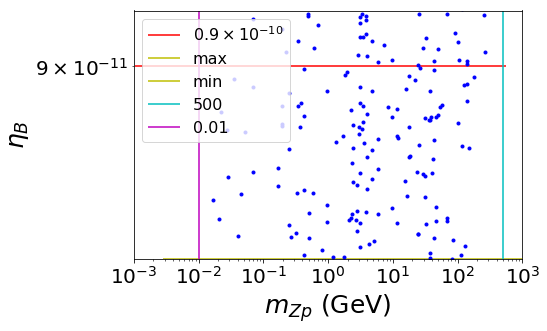

In [16]:
plt.figure(figsize=(8,5))

plt.loglog(gp.MZp,gp.Deltan_B/entropy,'b.',label=r'')

plt.hlines(0.9e-10,gp.MZp.min(),gp.MZp.max(),'r',label=r'$0.9 \times 10^{-10}$')
#Experimental range
plt.hlines(eta_max,xd.mot.min(),xd.mot.max(),'y',label=r'max')
plt.hlines(eta_min,xd.mot.min(),xd.mot.max(),'y',label=r'min')

plt.vlines(500,eta_min,eta_max,'c',label=r'500')
plt.vlines(1e-2,eta_min,eta_max,'m',label=r'0.01')

plt.ylim(eta_min,eta_max)
plt.xlim(1e-3,1e3)

plt.xlabel(r'$m_{Zp}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
plt.show()

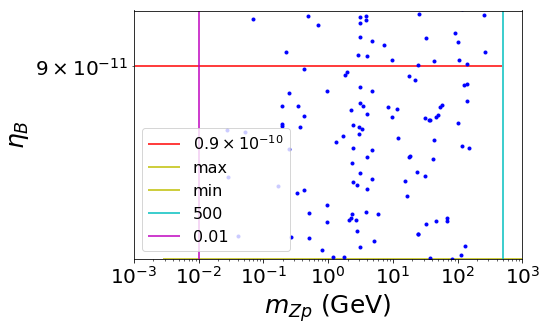

In [22]:
print(gp.MZp.min(),gp.MZp.max())

0.00105300454 489.275946


## randon parameters

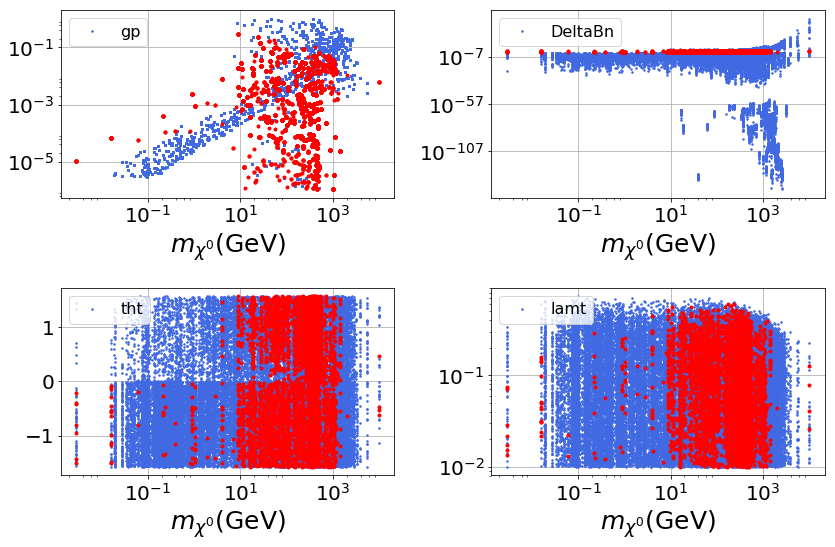

In [32]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.mot, xd['gp'], color='royalblue', marker='.',ms=3,linestyle='',label='gp')
plt.loglog(gp.mot, gp['gp'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.mot, xd['Deltan_B'], color='royalblue', marker='.',ms=3,linestyle='',label='DeltaBn')
plt.loglog(gp.mot, gp['Deltan_B'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.semilogx(xd.mot, xd['tht'], color='royalblue', marker='.',ms=3,linestyle='',label='tht')
plt.semilogx(gp.mot, gp['tht'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(xd.mot, xd['lamt'], color='royalblue', marker='.',ms=3,linestyle='',label='lamt')
plt.loglog(gp.mot, gp['lamt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()

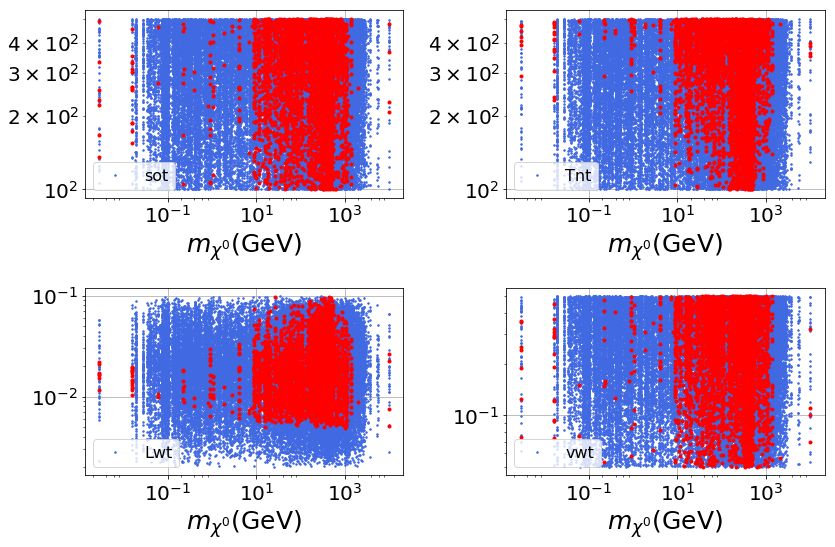

In [33]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.mot, xd['sot'], color='royalblue', marker='.',ms=3,linestyle='',label='sot')
plt.loglog(gp.mot, gp['sot'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.mot, xd['Tnt'], color='royalblue', marker='.',ms=3,linestyle='',label='Tnt')
plt.loglog(gp.mot, gp['Tnt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(xd.mot, xd['Lwt'], color='royalblue', marker='.',ms=3,linestyle='',label='Lwt')
plt.loglog(gp.mot, gp['Lwt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(xd.mot, xd['vwt'], color='royalblue', marker='.',ms=3,linestyle='',label='vwt')
plt.loglog(gp.mot, gp['vwt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


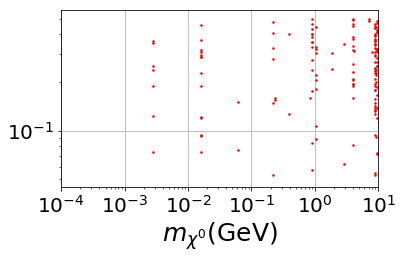

In [34]:
plt.figure(figsize=(6,4))

#plt.loglog(xd.mot, xd['vwt'], color='royalblue', marker='.',ms=3,linestyle='',label='vwt')
plt.loglog(gp.mot, gp['vwt'], color='red', marker='.',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()
plt.xlim(1e-4,10)

plt.tight_layout()
plt.show()

In [35]:
gp[gp.mot < 1]

,MZp,gp,Deltan_B,mot,tht,lamt,sot,Tnt,Lwt,vwt
2744,0.041329,0.000066,0.304836,0.015740,-0.634208,0.050171,257.390481,433.209563,0.019647,0.094155
5820,0.531339,0.000384,0.018165,0.217367,-1.351937,0.293636,444.783642,481.945350,0.018391,0.478059
6092,0.041329,0.000066,0.007415,0.015740,-0.277732,0.097569,262.662215,238.370990,0.014705,0.092873
6727,0.007624,0.000011,0.010279,0.002846,-0.388137,0.074803,221.578785,420.539726,0.021098,0.240331
24688,0.007624,0.000011,0.012310,0.002846,-1.433576,0.071031,136.218803,407.199571,0.022046,0.360103
24936,0.007624,0.000011,0.141545,0.002846,-0.412268,0.017166,334.295124,468.125382,0.015141,0.354529
26543,1.775114,0.002272,0.009106,0.892340,-0.544700,0.066684,400.331981,326.753296,0.029577,0.463598
26794,1.775114,0.002272,0.037011,0.892340,-1.522710,0.209445,193.193336,417.727533,0.011779,0.402939
32615,0.531339,0.000384,0.212254,0.217367,-0.259426,0.014149,298.588703,423.138117,0.009514,0.148484
35583,0.041329,0.000066,0.320974,0.015740,-1.127439,0.042968,302.814089,413.847949,0.013761,0.122609
